## Bağımsız İki Örneklem T Testi

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [ ]:
#VERI TIPI I

In [4]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])


A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["A","B"]

A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [5]:
#VERI TIPI II

In [10]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])

#A ve A'nın grubu
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
A = pd.concat([A, GRUP_A], axis = 1)

#B ve B'nin Grubu
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B = pd.concat([B, GRUP_B], axis = 1)

#Tum veri
AB = pd.concat([A,B])
AB.columns = ["gelir","GRUP"]
print(AB.head())
print(AB.tail())

   gelir GRUP
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    gelir GRUP
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


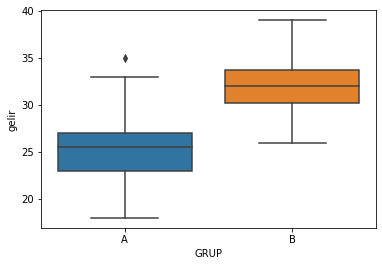

In [12]:
sns.boxplot(x="GRUP",y="gelir",data=AB);

### Normallik varsayımı

In [20]:
from scipy.stats import shapiro

In [16]:
shapiro(A_B.A)

ShapiroResult(statistic=0.9789242148399353, pvalue=0.7962799668312073)

In [17]:
shapiro(A_B.B)

ShapiroResult(statistic=0.9561260342597961, pvalue=0.24584221839904785)

### Varyans Homojenliği Varsayımı

H0:Varyanslar Homojendir.

H1:Varyanslar Homojen değildir.

In [22]:
stats.levene(A_B.A,A_B.B)

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

### Hipotez Testi

In [24]:
stats.ttest_ind(A_B.A,A_B.B,equal_var=True)

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

In [25]:
test_istatistigi, pvalue = stats.ttest_ind(A_B["A"], A_B["B"], equal_var=True)
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = -7.0287, p-değeri = 0.0000
